# PSA CodeSprint 2023 Sentiment Analysis
## Data Pre-Processing and Data Visualisation


####Importing and Installing necessary libraries and packages

In [1]:
!pip install newsapi-python

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
import nltk
nltk.download('vader_lexicon')
import json
import newsapi

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


####Attempt to extract the latest news from an API call - hoever does not work as it provides the most current data dating back to a few months back


In [3]:
# Set the API key
API_KEY = "65cd4e06fc3a4a519641c7cd6178e03a"

# NewsApiClient object
newsapi_client = newsapi.NewsApiClient(API_KEY)

query_url = "https://newsapi.org/v2/everything?q=maritime OR typhoon OR tsunami OR trade OR political unrest OR riots OR labour strike OR gantry accident OR gantry damage OR port+closure&from=2020-01-01&to=2022-12-31&language=en&sort_by=relevancy&page=2"

# the API call
all_articles = newsapi_client.get_everything(q=query_url)

# articles directly from the response
articles = all_articles["articles"]

# save the articles to a JSON file
all_articles_processed = []
for article in articles:
    all_articles_processed.append({
        "title": article["title"],
        "content": article["content"],
        "publication_date": article["publishedAt"]
    })

with open("maritime_news.json", "w") as f:
    json.dump(all_articles_processed, f)

print(all_articles_processed)

[{'title': 'Infinite Z-Axis Printer Aims to Print Itself Someday', 'content': '“The lathe is the only machine tool that can make copies of itself,” or so the saying goes. The reality is more like, “A skilled machinist can use a lathe to make many of the parts needed to assemble… [+1522 chars]', 'publication_date': '2023-09-15T23:00:13Z'}, {'title': 'Satellite Images Show the Devastating Cost of Sudan’s Aerial War', 'content': 'Yesterday, the head of the Sudanese Army, Abdel Fattah al-Burhan, addressed the United Nations General Assembly in New York City, asking for increased aid from the international community for Sudan a… [+3454 chars]', 'publication_date': '2023-09-22T18:30:00Z'}, {'title': 'Israel: Netanyahu wants immediate deportation of Eritreans after Tel Aviv violence', 'content': 'Media caption, Watch: Eritrean protesters clash with police who fire stun grenades and tear gas\r\nIsrael is considering tough steps including the immediate deportation of Eritrean asylum seekers inv

In [4]:
df = pd.read_json("maritime_news.json")

df.to_csv("maritime_news.csv", index=False)

In [5]:
news_data = pd.read_csv('maritime_news.csv')

news_data.head(5)

,title,content,publication_date
0,Infinite Z-Axis Printer Aims to Print Itself S...,“The lathe is the only machine tool that can m...,2023-09-15T23:00:13Z
1,Satellite Images Show the Devastating Cost of ...,"Yesterday, the head of the Sudanese Army, Abde...",2023-09-22T18:30:00Z
2,Israel: Netanyahu wants immediate deportation ...,"Media caption, Watch: Eritrean protesters clas...",2023-09-03T11:45:00Z
3,Nepal: Teachers strike over education reform s...,A massive teachers' strike in Nepal has entere...,2023-09-22T10:23:29Z
4,Why You Should Join a Neighborhood Food Swap,If youve ever pondered how to make new friends...,2023-08-31T13:00:00Z


####Change of approach to avaiable datasets online - using this BBC News dataset from kaggle : https://www.kaggle.com/datasets/gpreda/bbc-news

In [6]:
news_data = pd.read_csv('bbc_news.csv')

news_data.head(5)

,title,pubDate,guid,link,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...


In [7]:
news_data = news_data.drop(columns='link')
news_data = news_data.drop(columns='guid')

In [8]:
news_data

,title,pubDate,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT","Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",Consumers are feeling the impact of higher ene...
...,...,...,...
22824,Match of the Day analysis: Alan Shearer & Mica...,"Sat, 30 Sep 2023 23:00:20 GMT","Match of the Day pundits Gary Lineker, Alan Sh..."
22825,Jai Opetaia v Jordan Thompson: Champion stops ...,"Sat, 30 Sep 2023 22:30:23 GMT",British cruiserweight Jordan Thompson's world-...
22826,England 29-12 Canada: Red Roses seal series wi...,"Sat, 30 Sep 2023 16:50:50 GMT",England complete their preparations for the in...
22827,Wolverhampton Wanderers 2-1 Manchester City: C...,"Sat, 30 Sep 2023 16:16:35 GMT",Manchester City suffer their first Premier Lea...


In [9]:
#adding new columns to obtain sentimental score
news_data = news_data.copy()
news_data["sentiment_score"] = ''
news_data["Negative"] = ''
news_data["Neutral"] = ''
news_data["Positive"] = ''

In [10]:
%%time

sentiment_analyzer = SentimentIntensityAnalyzer()
for indx, row in news_data.T.items():
    try:
        sentence_i = unicodedata.normalize('NFKD', news_data.loc[indx, 'description'])
        sentence_sentiment = sentiment_analyzer.polarity_scores(sentence_i)
        news_data.at[indx, 'sentiment_score'] = sentence_sentiment['compound']
        news_data.at[indx, 'Negative'] = sentence_sentiment['neg']
        news_data.at[indx, 'Neutral'] = sentence_sentiment['neu']
        news_data.at[indx, 'Positive'] = sentence_sentiment['pos']
    except TypeError:
        print (news_data.loc[indx, 'description'])
        print (indx)
        break

news_data

CPU times: user 6.92 s, sys: 38.1 ms, total: 6.96 s
Wall time: 7.04 s


,title,pubDate,description,sentiment_score,Negative,Neutral,Positive
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",The Ukrainian president says the country will ...,-0.7048,0.308,0.614,0.079
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT","Jeremy Bowen was on the frontline in Irpin, as...",-0.34,0.124,0.876,0.0
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",One of the world's biggest fertiliser firms sa...,-0.5994,0.259,0.741,0.0
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",The parents of the Manchester Arena bombing's ...,-0.6908,0.289,0.711,0.0
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",Consumers are feeling the impact of higher ene...,0.3818,0.0,0.795,0.205
...,...,...,...,...,...,...,...
22824,Match of the Day analysis: Alan Shearer & Mica...,"Sat, 30 Sep 2023 23:00:20 GMT","Match of the Day pundits Gary Lineker, Alan Sh...",-0.2023,0.053,0.947,0.0
22825,Jai Opetaia v Jordan Thompson: Champion stops ...,"Sat, 30 Sep 2023 22:30:23 GMT",British cruiserweight Jordan Thompson's world-...,-0.296,0.209,0.621,0.17
22826,England 29-12 Canada: Red Roses seal series wi...,"Sat, 30 Sep 2023 16:50:50 GMT",England complete their preparations for the in...,0.0,0.0,1.0,0.0
22827,Wolverhampton Wanderers 2-1 Manchester City: C...,"Sat, 30 Sep 2023 16:16:35 GMT",Manchester City suffer their first Premier Lea...,-0.6486,0.338,0.52,0.141


In [11]:
news_data = news_data.drop(columns='Negative')
news_data = news_data.drop(columns='Neutral')
news_data = news_data.drop(columns='Positive')

news_data

,title,pubDate,description,sentiment_score
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",The Ukrainian president says the country will ...,-0.7048
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT","Jeremy Bowen was on the frontline in Irpin, as...",-0.34
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",One of the world's biggest fertiliser firms sa...,-0.5994
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",The parents of the Manchester Arena bombing's ...,-0.6908
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",Consumers are feeling the impact of higher ene...,0.3818
...,...,...,...,...
22824,Match of the Day analysis: Alan Shearer & Mica...,"Sat, 30 Sep 2023 23:00:20 GMT","Match of the Day pundits Gary Lineker, Alan Sh...",-0.2023
22825,Jai Opetaia v Jordan Thompson: Champion stops ...,"Sat, 30 Sep 2023 22:30:23 GMT",British cruiserweight Jordan Thompson's world-...,-0.296
22826,England 29-12 Canada: Red Roses seal series wi...,"Sat, 30 Sep 2023 16:50:50 GMT",England complete their preparations for the in...,0.0
22827,Wolverhampton Wanderers 2-1 Manchester City: C...,"Sat, 30 Sep 2023 16:16:35 GMT",Manchester City suffer their first Premier Lea...,-0.6486


In [12]:
news_data['publication_date'] = pd.to_datetime(news_data['pubDate'])
news_data['date_column'] = news_data['publication_date'].dt.date
news_data['time_column'] = news_data['publication_date'].dt.time


news_data

,title,pubDate,description,sentiment_score,publication_date,date_column,time_column
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",The Ukrainian president says the country will ...,-0.7048,2022-03-07 08:01:56+00:00,2022-03-07,08:01:56
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT","Jeremy Bowen was on the frontline in Irpin, as...",-0.34,2022-03-06 22:49:58+00:00,2022-03-06,22:49:58
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",One of the world's biggest fertiliser firms sa...,-0.5994,2022-03-07 00:14:42+00:00,2022-03-07,00:14:42
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",The parents of the Manchester Arena bombing's ...,-0.6908,2022-03-07 00:05:40+00:00,2022-03-07,00:05:40
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",Consumers are feeling the impact of higher ene...,0.3818,2022-03-07 08:15:53+00:00,2022-03-07,08:15:53
...,...,...,...,...,...,...,...
22824,Match of the Day analysis: Alan Shearer & Mica...,"Sat, 30 Sep 2023 23:00:20 GMT","Match of the Day pundits Gary Lineker, Alan Sh...",-0.2023,2023-09-30 23:00:20+00:00,2023-09-30,23:00:20
22825,Jai Opetaia v Jordan Thompson: Champion stops ...,"Sat, 30 Sep 2023 22:30:23 GMT",British cruiserweight Jordan Thompson's world-...,-0.296,2023-09-30 22:30:23+00:00,2023-09-30,22:30:23
22826,England 29-12 Canada: Red Roses seal series wi...,"Sat, 30 Sep 2023 16:50:50 GMT",England complete their preparations for the in...,0.0,2023-09-30 16:50:50+00:00,2023-09-30,16:50:50
22827,Wolverhampton Wanderers 2-1 Manchester City: C...,"Sat, 30 Sep 2023 16:16:35 GMT",Manchester City suffer their first Premier Lea...,-0.6486,2023-09-30 16:16:35+00:00,2023-09-30,16:16:35


In [13]:
#drop unnecessary columns
news_data = news_data.drop(columns='publication_date')
news_data = news_data.drop(columns='pubDate')
news_data = news_data.drop(columns='time_column')
news_data

,title,description,sentiment_score,date_column
0,Ukraine: Angry Zelensky vows to punish Russian...,The Ukrainian president says the country will ...,-0.7048,2022-03-07
1,War in Ukraine: Taking cover in a town under a...,"Jeremy Bowen was on the frontline in Irpin, as...",-0.34,2022-03-06
2,Ukraine war 'catastrophic for global food',One of the world's biggest fertiliser firms sa...,-0.5994,2022-03-07
3,Manchester Arena bombing: Saffie Roussos's par...,The parents of the Manchester Arena bombing's ...,-0.6908,2022-03-07
4,Ukraine conflict: Oil price soars to highest l...,Consumers are feeling the impact of higher ene...,0.3818,2022-03-07
...,...,...,...,...
22824,Match of the Day analysis: Alan Shearer & Mica...,"Match of the Day pundits Gary Lineker, Alan Sh...",-0.2023,2023-09-30
22825,Jai Opetaia v Jordan Thompson: Champion stops ...,British cruiserweight Jordan Thompson's world-...,-0.296,2023-09-30
22826,England 29-12 Canada: Red Roses seal series wi...,England complete their preparations for the in...,0.0,2023-09-30
22827,Wolverhampton Wanderers 2-1 Manchester City: C...,Manchester City suffer their first Premier Lea...,-0.6486,2023-09-30


In [14]:
sentiment_news_data = news_data.copy()

average_values = sentiment_news_data.groupby(["title"])["sentiment_score"].mean().reset_index()
sentiment_news_data = pd.merge(sentiment_news_data, average_values, on=["title"], suffixes=("", "_avg"))

sentiment_news_data

,title,description,sentiment_score,date_column,sentiment_score_avg
0,Ukraine: Angry Zelensky vows to punish Russian...,The Ukrainian president says the country will ...,-0.7048,2022-03-07,-0.7048
1,War in Ukraine: Taking cover in a town under a...,"Jeremy Bowen was on the frontline in Irpin, as...",-0.34,2022-03-06,-0.3400
2,Ukraine war 'catastrophic for global food',One of the world's biggest fertiliser firms sa...,-0.5994,2022-03-07,-0.5994
3,Manchester Arena bombing: Saffie Roussos's par...,The parents of the Manchester Arena bombing's ...,-0.6908,2022-03-07,-0.6908
4,Ukraine conflict: Oil price soars to highest l...,Consumers are feeling the impact of higher ene...,0.3818,2022-03-07,0.3818
...,...,...,...,...,...
22824,Match of the Day analysis: Alan Shearer & Mica...,"Match of the Day pundits Gary Lineker, Alan Sh...",-0.2023,2023-09-30,-0.2023
22825,Jai Opetaia v Jordan Thompson: Champion stops ...,British cruiserweight Jordan Thompson's world-...,-0.296,2023-09-30,-0.2960
22826,England 29-12 Canada: Red Roses seal series wi...,England complete their preparations for the in...,0.0,2023-09-30,0.0000
22827,Wolverhampton Wanderers 2-1 Manchester City: C...,Manchester City suffer their first Premier Lea...,-0.6486,2023-09-30,-0.6486


In [15]:
label = []
for row in sentiment_news_data['sentiment_score_avg']:
    if row > 0.0000 or row == 0.0000:
        label.append(1)
    elif row < 0.0000:
        label.append(0)

sentiment_news_data['label'] = label
sentiment_news_data

,title,description,sentiment_score,date_column,sentiment_score_avg,label
0,Ukraine: Angry Zelensky vows to punish Russian...,The Ukrainian president says the country will ...,-0.7048,2022-03-07,-0.7048,0
1,War in Ukraine: Taking cover in a town under a...,"Jeremy Bowen was on the frontline in Irpin, as...",-0.34,2022-03-06,-0.3400,0
2,Ukraine war 'catastrophic for global food',One of the world's biggest fertiliser firms sa...,-0.5994,2022-03-07,-0.5994,0
3,Manchester Arena bombing: Saffie Roussos's par...,The parents of the Manchester Arena bombing's ...,-0.6908,2022-03-07,-0.6908,0
4,Ukraine conflict: Oil price soars to highest l...,Consumers are feeling the impact of higher ene...,0.3818,2022-03-07,0.3818,1
...,...,...,...,...,...,...
22824,Match of the Day analysis: Alan Shearer & Mica...,"Match of the Day pundits Gary Lineker, Alan Sh...",-0.2023,2023-09-30,-0.2023,0
22825,Jai Opetaia v Jordan Thompson: Champion stops ...,British cruiserweight Jordan Thompson's world-...,-0.296,2023-09-30,-0.2960,0
22826,England 29-12 Canada: Red Roses seal series wi...,England complete their preparations for the in...,0.0,2023-09-30,0.0000,1
22827,Wolverhampton Wanderers 2-1 Manchester City: C...,Manchester City suffer their first Premier Lea...,-0.6486,2023-09-30,-0.6486,0


In [16]:
final_news_data = sentiment_news_data.drop(columns='sentiment_score')

####Obtained the final news dataset with the derived sentiment scores and labels

In [17]:
final_news_data

,title,description,date_column,sentiment_score_avg,label
0,Ukraine: Angry Zelensky vows to punish Russian...,The Ukrainian president says the country will ...,2022-03-07,-0.7048,0
1,War in Ukraine: Taking cover in a town under a...,"Jeremy Bowen was on the frontline in Irpin, as...",2022-03-06,-0.3400,0
2,Ukraine war 'catastrophic for global food',One of the world's biggest fertiliser firms sa...,2022-03-07,-0.5994,0
3,Manchester Arena bombing: Saffie Roussos's par...,The parents of the Manchester Arena bombing's ...,2022-03-07,-0.6908,0
4,Ukraine conflict: Oil price soars to highest l...,Consumers are feeling the impact of higher ene...,2022-03-07,0.3818,1
...,...,...,...,...,...
22824,Match of the Day analysis: Alan Shearer & Mica...,"Match of the Day pundits Gary Lineker, Alan Sh...",2023-09-30,-0.2023,0
22825,Jai Opetaia v Jordan Thompson: Champion stops ...,British cruiserweight Jordan Thompson's world-...,2023-09-30,-0.2960,0
22826,England 29-12 Canada: Red Roses seal series wi...,England complete their preparations for the in...,2023-09-30,0.0000,1
22827,Wolverhampton Wanderers 2-1 Manchester City: C...,Manchester City suffer their first Premier Lea...,2023-09-30,-0.6486,0


###Dataset to obtain vessel data, mainly the vessel name and vessel arrival date to port - used this cargo tracking dataset available online : https://www.kaggle.com/datasets/muzammalnawaz/container-tracking-data-set/

In [18]:
vessel_data = pd.read_csv('Container_Vessel_Data.csv')

vessel_data.head(5)

,CONTAINER_NUMBER,VESSEL_NAME,FREIGHT_FORWARDER,PLACE_OF_DISPATCH,PORT_OF_LOADING,PORT_OF_DISCHARGE,POST_PORT_OF_DISCHARGE,PLACE_OF_DISPATCH_DATE,PORT_OF_LOADING_DATE,PORT_OF_DISCHARGE_DATE,POST_PORT_OF_DISCHARGE_DATE,PREDICTED_DELIVERED_DATE,LAST_TRACKED_WITH_VESSEL,DELIVERED_FLAG,DELIVERED_DATE
0,FCIU8573349,CAPE SOUNIO,CIF,"Yantian, Guangdong Sheng, China","Yantian, Guangdong Sheng, China","Long Beach, California, United States","Dallas, Texas, United States",18/5/21,19/5/21,17/7/21,15/7/21,3/8/21,3/8/21,Yes,21/7/21
1,TGBU9903815,CAPE SOUNIO,CIF,"Yantian, Guangdong Sheng, China","Yantian, Guangdong Sheng, China","Long Beach, California, United States","Dallas, Texas, United States",18/5/21,19/5/21,23/7/21,21/7/21,9/8/21,26/7/21,Yes,27/7/21
2,TCNU3242533,OOCL LUXEMBOURG,Axiom,"Shanghai, Shanghai Shi, China","Shanghai, Shanghai Shi, China","Long Beach, California, United States","Gainesville, Texas, United States",11/4/21,17/4/21,5/5/21,7/6/21,11/6/21,20/6/21,Yes,16/6/21
3,FCIU8623774,MSC ORION,LF,"Vung Tau, Tinh Ba Ria-Vung Tau, Vietnam","Ho Chi Minh City, Ho Chi Minh City, Vietnam","Long Beach, California, United States","Dallas, Texas, United States",19/5/21,20/5/21,15/7/21,12/7/21,19/7/21,24/8/21,Yes,20/7/21
4,FCIU9776905,COSCO ENGLAND,CIF,"Yantian, Guangdong Sheng, China","Yantian, Guangdong Sheng, China","Long Beach, California, United States","Gainesville, Texas, United States",18/5/21,24/5/21,11/6/21,22/6/21,26/6/21,26/6/21,Yes,28/6/21


In [19]:
#remove not needed columns
vessel_data = vessel_data.drop(columns='CONTAINER_NUMBER')
vessel_data = vessel_data.drop(columns='FREIGHT_FORWARDER')
vessel_data = vessel_data.drop(columns='PLACE_OF_DISPATCH')
vessel_data = vessel_data.drop(columns='PORT_OF_LOADING')
vessel_data = vessel_data.drop(columns='POST_PORT_OF_DISCHARGE')
vessel_data = vessel_data.drop(columns='PLACE_OF_DISPATCH_DATE')
vessel_data = vessel_data.drop(columns='PORT_OF_LOADING_DATE')
vessel_data = vessel_data.drop(columns='POST_PORT_OF_DISCHARGE_DATE')
vessel_data = vessel_data.drop(columns='PREDICTED_DELIVERED_DATE')
vessel_data = vessel_data.drop(columns='DELIVERED_FLAG')
vessel_data = vessel_data.drop(columns='DELIVERED_DATE')

In [20]:
vessel_data['date'] = vessel_data['PORT_OF_DISCHARGE_DATE']
vessel_data

,VESSEL_NAME,PORT_OF_DISCHARGE,PORT_OF_DISCHARGE_DATE,LAST_TRACKED_WITH_VESSEL,date
0,CAPE SOUNIO,"Long Beach, California, United States",17/7/21,3/8/21,17/7/21
1,CAPE SOUNIO,"Long Beach, California, United States",23/7/21,26/7/21,23/7/21
2,OOCL LUXEMBOURG,"Long Beach, California, United States",5/5/21,20/6/21,5/5/21
3,MSC ORION,"Long Beach, California, United States",15/7/21,24/8/21,15/7/21
4,COSCO ENGLAND,"Long Beach, California, United States",11/6/21,26/6/21,11/6/21
...,...,...,...,...,...
1825,PEARL RIVER BRIDGE,"Los Angeles, California, United States",16/2/22,16/2/22,16/2/22
1826,CSCL YELLOW SEA,"Long Beach, California, United States",12/3/22,18/2/22,12/3/22
1827,AS SARA,"Long Beach, California, United States",1/3/22,18/2/22,1/3/22
1828,CSCL SUMMER,"Dallas, Texas, United States",29/3/22,15/2/22,29/3/22


In [21]:
start_date_str = "2018-01-01"
end_date_str = "2022-12-03"

# date column to datetime
vessel_data['date'] = pd.to_datetime(vessel_data['date'])

# Filter for rows within date range
filtered_df = vessel_data[(vessel_data['date'] >= start_date_str)]
filtered_df =  vessel_data[(vessel_data['date'] <= end_date_str)]

In [22]:
filtered_df

,VESSEL_NAME,PORT_OF_DISCHARGE,PORT_OF_DISCHARGE_DATE,LAST_TRACKED_WITH_VESSEL,date
0,CAPE SOUNIO,"Long Beach, California, United States",17/7/21,3/8/21,2021-07-17
1,CAPE SOUNIO,"Long Beach, California, United States",23/7/21,26/7/21,2021-07-23
2,OOCL LUXEMBOURG,"Long Beach, California, United States",5/5/21,20/6/21,2021-05-05
3,MSC ORION,"Long Beach, California, United States",15/7/21,24/8/21,2021-07-15
4,COSCO ENGLAND,"Long Beach, California, United States",11/6/21,26/6/21,2021-11-06
...,...,...,...,...,...
1825,PEARL RIVER BRIDGE,"Los Angeles, California, United States",16/2/22,16/2/22,2022-02-16
1826,CSCL YELLOW SEA,"Long Beach, California, United States",12/3/22,18/2/22,2022-12-03
1827,AS SARA,"Long Beach, California, United States",1/3/22,18/2/22,2022-01-03
1828,CSCL SUMMER,"Dallas, Texas, United States",29/3/22,15/2/22,2022-03-29


In [23]:
final_news_data['date'] = final_news_data['date_column']

In [24]:
start_date_str = "2018-01-01"
end_date_str = "2022-12-03"

# date column to datetime
final_news_data['date'] = pd.to_datetime(final_news_data['date'])

# Filter for rows within date range
filtered_news = final_news_data[(final_news_data['date'] >= start_date_str)]
filtered_news =  final_news_data[(final_news_data['date'] <= end_date_str)]

In [25]:
filtered_news

,title,description,date_column,sentiment_score_avg,label,date
0,Ukraine: Angry Zelensky vows to punish Russian...,The Ukrainian president says the country will ...,2022-03-07,-0.7048,0,2022-03-07
1,War in Ukraine: Taking cover in a town under a...,"Jeremy Bowen was on the frontline in Irpin, as...",2022-03-06,-0.3400,0,2022-03-06
2,Ukraine war 'catastrophic for global food',One of the world's biggest fertiliser firms sa...,2022-03-07,-0.5994,0,2022-03-07
3,Manchester Arena bombing: Saffie Roussos's par...,The parents of the Manchester Arena bombing's ...,2022-03-07,-0.6908,0,2022-03-07
4,Ukraine conflict: Oil price soars to highest l...,Consumers are feeling the impact of higher ene...,2022-03-07,0.3818,1,2022-03-07
...,...,...,...,...,...,...
17588,Tips on how to save energy at home and help th...,What can homeowners do to reduce their energy ...,2021-10-20,0.2732,1,2021-10-20
18668,Pisces III submersible: A dramatic underwater ...,Fifty years ago two Britons spent three days t...,2013-08-30,-0.0258,0,2013-08-30
19897,Prince's original of Nothing Compares 2 U rele...,The star's original version of the song was re...,2018-04-20,0.3182,1,2018-04-20
20208,"Trump: I just want to find 11,780 votes",US President Donald Trump is heard telling Geo...,2021-01-03,0.2023,1,2021-01-03


In [26]:
# Merge the datasets on the common dates
final_data = pd.merge(filtered_df, filtered_news, on=['date'])

In [27]:
final_data

,VESSEL_NAME,PORT_OF_DISCHARGE,PORT_OF_DISCHARGE_DATE,LAST_TRACKED_WITH_VESSEL,date,title,description,date_column,sentiment_score_avg,label
0,OOCL UTAH,"Long Beach, California, United States",1/3/21,21/4/21,2021-01-03,"Trump: I just want to find 11,780 votes",US President Donald Trump is heard telling Geo...,2021-01-03,0.2023,1
1,COSCO THAILAND,"Prince Rupert, British Columbia, Canada",1/3/21,21/4/21,2021-01-03,"Trump: I just want to find 11,780 votes",US President Donald Trump is heard telling Geo...,2021-01-03,0.2023,1
2,ALS MARS,"Los Angeles, California, United States",23/3/21,21/4/21,2021-03-23,Grenfell Tower inquiry: 9 things we now know a...,A public inquiry has questioned employees of t...,2021-03-23,-0.1027,0
3,MAERSK KALAMATA,"Houston, Texas, United States",11/1/22,14/1/22,2022-11-01,The Papers: Braverman cabinet 'anger' and 'tax...,Most papers focus on the pressure piling on Su...,2022-11-01,-0.7430,0
4,MAERSK KALAMATA,"Houston, Texas, United States",11/1/22,14/1/22,2022-11-01,Matt Hancock suspended as Tory MP for joining ...,The former health secretary is punished by his...,2022-11-01,0.2263,1
...,...,...,...,...,...,...,...,...,...,...
8123,MSC PINA,"Houston, Texas, United States",28/3/22,18/2/22,2022-03-28,Ukraine war: Bringing up a baby among the bombs,More than 1.5 million children have fled Ukrai...,2022-03-28,0.0000,1
8124,MSC PINA,"Houston, Texas, United States",28/3/22,18/2/22,2022-03-28,Your daily Ukraine round-up,The Chelsea FC owner - who has now recovered -...,2022-03-28,-0.6908,0
8125,MSC PINA,"Houston, Texas, United States",28/3/22,18/2/22,2022-03-28,João Carvalhaes: Football's psychology pioneer...,João Carvalhaes introduced psychology labs to ...,2022-03-28,0.0000,1
8126,MSC PINA,"Houston, Texas, United States",28/3/22,18/2/22,2022-03-28,Amazon union election: Will this former worker...,Workers in three Amazon warehouses are decidin...,2022-03-28,0.4404,1


##Model Development

####Used a Random Forest Regressor machine learning algorithmn to observe the relation between the sentiment scores obtained from analysing the news with the arrival times of vessels to port hence predicting the effect of the news on the vessel times.

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# defining features to use
X = final_data[['sentiment_score_avg']]
y = pd.to_datetime(final_data['PORT_OF_DISCHARGE_DATE']).astype(int) // 10**9
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the random forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# predictions on the test set
y_pred = model.predict(X_test)

# model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


[1.65858224e+09 1.65695352e+09 1.65097185e+09 ... 1.65644396e+09
 1.66188744e+09 1.65743241e+09]
Mean Squared Error: 48916289147692.35
R-squared: 0.2071803472747097


In [29]:
#predicting arrival time of vessel into port based on news
def predict_arrival_time(final_news_data):
    input_df = pd.DataFrame({
        'sentiment_score_avg': final_data['sentiment_score_avg'],
    })
    predicted_timestamp = model.predict(input_df)
    predicted_date = pd.to_datetime(predicted_timestamp, unit='s')

    return predicted_date

news_data = {
    'sentiment_score_avg': 0.2263,
}

predicted_arrival_time = predict_arrival_time(news_data)
print(f"Predicted Arrival Time: {predicted_arrival_time}")


Predicted Arrival Time: DatetimeIndex(['2022-05-18 16:54:08.167054336',
               '2022-05-18 16:54:08.167054336',
               '2022-07-27 07:33:35.544445952',
               '2022-09-08 20:09:28.277957376',
               '2022-07-09 17:20:02.542333696',
               '2022-08-02 15:28:13.272483840',
               '2022-06-06 12:05:35.311280128',
               '2022-06-28 19:19:21.946188032',
               '2022-10-18 09:39:47.785762304',
               '2022-09-05 13:43:48.721175040',
               ...
               '2022-06-28 19:19:21.946188032',
               '2022-06-28 19:19:21.946188032',
               '2022-07-04 16:52:03.337814272',
               '2022-03-16 23:06:28.610849792',
               '2022-06-28 19:19:21.946188032',
               '2022-06-28 19:19:21.946188032',
               '2022-04-27 05:03:35.560295936',
               '2022-06-28 19:19:21.946188032',
               '2022-07-05 18:50:39.402569472',
               '2022-11-17 10:21:46.799212032

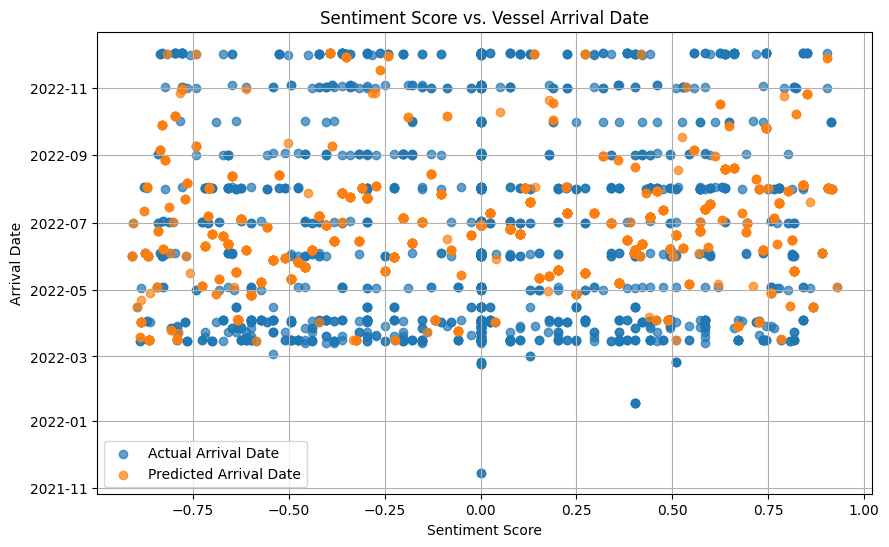

In [30]:
actual_arrival_times = pd.to_datetime(y_test, unit='s')
predicted_arrival_times = pd.to_datetime(y_pred, unit='s')

# actual and predicted arrival dates
predicted_df = pd.DataFrame({'Actual Arrival Date': actual_arrival_times, 'Predicted Arrival Date': predicted_arrival_times})

# Plot sentiment score vs actual and predicted arrival dates
plt.figure(figsize=(10, 6))
plt.scatter(X_test['sentiment_score_avg'], predicted_df['Actual Arrival Date'], label='Actual Arrival Date', alpha=0.7)
plt.scatter(X_test['sentiment_score_avg'], predicted_df['Predicted Arrival Date'], label='Predicted Arrival Date', alpha=0.7)

plt.title('Sentiment Score vs. Vessel Arrival Date')
plt.xlabel('Sentiment Score')
plt.ylabel('Arrival Date')
plt.legend()
plt.grid(True)

plt.show()


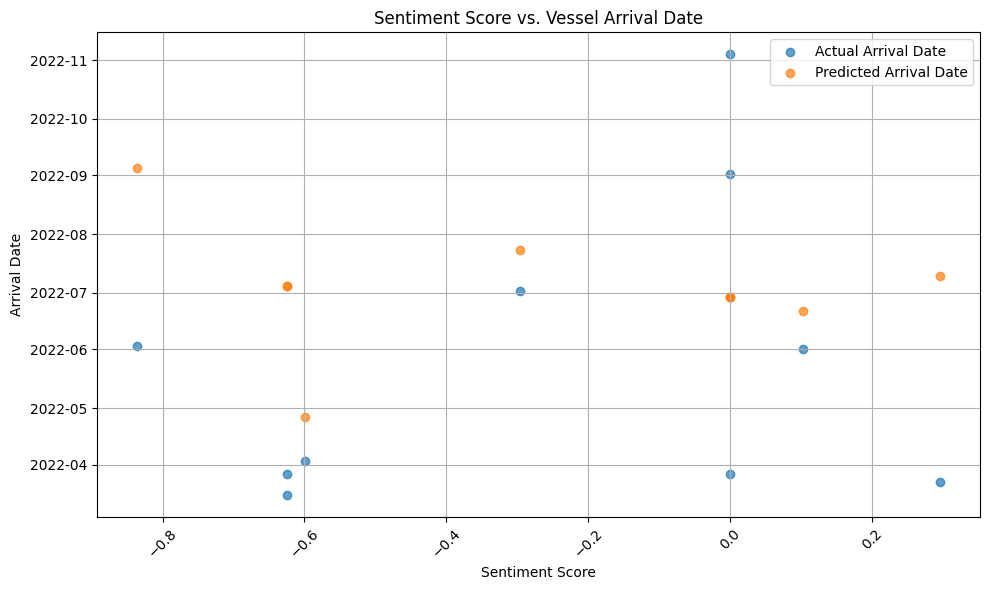

In [31]:
# Picking smaller sample size to visualize better
sample_size = 10
sample_actual_arrival_dates = pd.to_datetime(y_test[:sample_size], unit='s')
sample_predicted_arrival_dates = pd.to_datetime(y_pred[:sample_size], unit='s')
sample_sentiment_scores = X_test['sentiment_score_avg'][:sample_size]

# Plot sentiment score vs actual and predicted arrival dates
plt.figure(figsize=(10, 6))
plt.scatter(sample_sentiment_scores, sample_actual_arrival_dates, label='Actual Arrival Date', alpha=0.7)
plt.scatter(sample_sentiment_scores, sample_predicted_arrival_dates, label='Predicted Arrival Date', alpha=0.7)

plt.title('Sentiment Score vs. Vessel Arrival Date')
plt.xlabel('Sentiment Score')
plt.ylabel('Arrival Date')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##Conclusion of the Analysis

The model appears to function based on data preparation, training, and testing. But,it produces a very high mean square loss and a low R-square value, indicating that the data used is quite diverse making the prediction less reliable. As shown in the final graphs, we can forecast when the ship will arrive in port based on the news content, however the figures can be sometimes close and other times farther off. Depending on the data used to build the model, this can be greatly enhanced. I had trouble extracting datasets and finding them, so I used ones that were readily available to the public. In the future, more precise news can be extracted and PSA-specific information like vessel arrival and berthing time can be obtained from Portnet. These will make it possible for port officials to make projections that are more accurate, allowing them to allocate resources more efficiently, such as berths to ships. Larger deep learning models can also be trained for greater precision.